In [35]:
from qiskit import QuantumCircuit, assemble, Aer
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_vector, array_to_latex, plot_bloch_multivector
from math import sqrt, pi
from IPython.display import display, Math
from qiskit.quantum_info import random_statevector

In [45]:
n = 4
secret_string = "0111"

     ┌───┐┌───┐     ┌─┐                        
q_0: ┤ H ├┤ H ├─────┤M├────────────────────────
     ├───┤└───┘     └╥┘┌───┐     ┌─┐           
q_1: ┤ H ├───────■───╫─┤ H ├─────┤M├───────────
     ├───┤       │   ║ └───┘┌───┐└╥┘     ┌─┐   
q_2: ┤ H ├───────┼───╫───■──┤ H ├─╫──────┤M├───
     ├───┤       │   ║   │  └───┘ ║ ┌───┐└╥┘┌─┐
q_3: ┤ H ├───────┼───╫───┼────■───╫─┤ H ├─╫─┤M├
     ├───┤┌───┐┌─┴─┐ ║ ┌─┴─┐┌─┴─┐ ║ └───┘ ║ └╥┘
q_4: ┤ X ├┤ H ├┤ X ├─╫─┤ X ├┤ X ├─╫───────╫──╫─
     └───┘└───┘└───┘ ║ └───┘└───┘ ║       ║  ║ 
c: 4/════════════════╩════════════╩═══════╩══╩═
                     3            2       1  0 


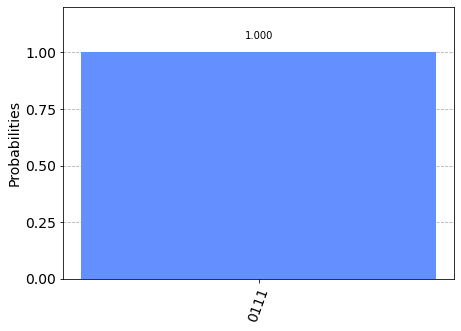

In [46]:
qc = QuantumCircuit(n + 1, n)
qc.x(n)
qc.h(n)
for i in range(n):
    qc.h(i)
for i in range(n):
    if secret_string[i] == "1":
        qc.cx(i, n)
for i in range(n):
    qc.h(i)
for i in range(n):
    qc.measure(i, n-1-i)
print(qc.draw())
sim = Aer.get_backend('aer_simulator')
counts = sim.run(assemble(qc)).result().get_counts()
plot_histogram(counts)